In [61]:
import pandas as pd
from matplotlib.pyplot import plot
mean_alpha = 1.35

In [62]:
options = pd.read_csv("banknifty-options.csv")
options1 = pd.read_csv("banknifty-options-ce.csv")
prices = pd.read_csv("banknifty-prices.csv")

In [63]:
options["Alpha"] = (prices["Close"] - options["Strike Price"]) / options["Close"]
prices["Change"] = ((prices["Close"] - prices["Open"]) / prices["Close"])*100
# options["Alpha-Prev"] = options.Alpha.shift(1)
options["Alpha-Change"] = ((options["Alpha"] - options.Alpha.shift(1)) / options["Alpha"])*100
options["Alpha-Mean"] = (options.Alpha.shift(1)+options.Alpha.shift(2)+options.Alpha.shift(3)) / 3
options["Change"] = ((options["Open"] - options["Close"]) / options["Open"])*100

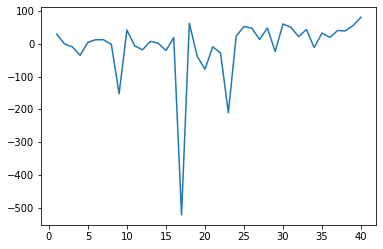

In [64]:
plot(options["Alpha-Change"])
# plot(options["Change"])

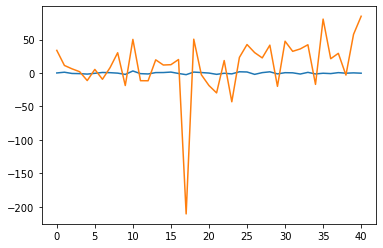

In [65]:
plot(prices["Change"])
plot(options["Change"])

In [66]:
# prices

In [67]:
test.head()

,Symbol,Date,Expiry,Option Type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover in Lacs,Premium Turnover in Lacs,Open Int,Change in OI,Underlying Value
0,BANKNIFTYBANKNIFTY,01-Feb-202201-Feb-2022,31-Mar-202231-Mar-2022,PECE,60000,69.85,69.85,42.0,8246.15,8242.00,8777.05,283,2126.13,3.63,8225,1200,--
1,BANKNIFTYBANKNIFTY,02-Feb-202202-Feb-2022,31-Mar-202231-Mar-2022,PECE,60000,40.00,43.95,33.0,8235.45,8235.05,9577.80,137,1028.78,1.28,8225,0,39330.539330.5
2,BANKNIFTYBANKNIFTY,03-Feb-202203-Feb-2022,31-Mar-202231-Mar-2022,PECE,60000,36.50,44.90,31.0,8234.20,8237.50,9253.95,177,1329.06,1.56,8775,550,--
3,BANKNIFTYBANKNIFTY,04-Feb-202204-Feb-2022,31-Mar-202231-Mar-2022,PECE,60000,37.05,43.00,32.7,8236.30,8237.55,9033.85,120,901.08,1.08,8975,200,--
4,BANKNIFTYBANKNIFTY,07-Feb-202207-Feb-2022,31-Mar-202231-Mar-2022,PECE,60000,8340.00,8360.00,8334.5,8344.50,8345.00,8244.25,609,4575.89,8.39,12800,3825,--


In [68]:
threshold = 0.3
max_profit = 0
optimal_thresh = 0
while(threshold <= 2):
    net_result = 0
    threshold += 0.01
    for index,rows in options.iterrows():
        if index < 0:
            continue
        if (rows["Alpha"] / rows["Alpha-Mean"]) > threshold:
#             print("Buy!")
            try:
                result = options["Change"][index+1]
                net_result += result
            except:
                pass
    if net_result >= max_profit:
        max_profit = net_result
        optimal_thresh = threshold

print("Net profit : " + str(max_profit))
print("Optimal Threshold: " + str(optimal_thresh))

Net profit : 518.5902092452027
Optimal Threshold: 1.2300000000000006


In [69]:
net_result = 0
for index,rows in options.iterrows():
        if index < 0:
            continue
        if (rows["Alpha"] / rows["Alpha-Mean"]) > mean_alpha:
#             print("Buy!")
            try:
                result = options["Change"][index+1]
                net_result += result
            except:
                pass
print(str(net_result))   

440.54735210234554
